In [4]:
file = open(r'Homework_sampledata1.txt')
lines=file.readlines()
file.close()
lines=lines[1:]
for i in range (len(lines)):
    lines[i]=lines[i].split()[1:]
for i in range (len(lines)):
    for j in range(len(lines[i])):
        lines[i][j]=float(lines[i][j])


In [7]:
lines

[[10.5, 7.3, 10.8, 18.2, 20.0, 25.3, 27.2, 25.1, 25.8, 23.0, 24.9, 12.6],
 [9.8, 10.4, 10.7, 18.0, 25.4, 24.8, 26.6, 26.1, 26.7, 23.5, 20.9, 13.9],
 [10.7, 11.0, 11.7, 18.8, 25.4, 26.5, 27.4, 25.8, 25.1, 24.5, 20.4, 17.7],
 [15.1, 12.9, 12.4, 20.4, 26.5, 25.2, 27.2, 25.3, 26.0, 23.0, 23.1, 20.5],
 [13.5, 11.4, 16.0, 22.4, 24.0, 26.0, 26.2, 26.2, 23.5, 22.7, 22.5, 16.7],
 [16.0, 11.0, 16.7, 23.6, 24.0, 26.2, 25.5, 26.4, 24.6, 22.8, 23.8, 17.6],
 [15.8, 10.3, 17.1, 23.6, 25.1, 27.8, 25.0, 25.0, 24.7, 24.4, 19.6, 16.4],
 [15.8, 12.1, 16.9, 26.4, 25.1, 24.8, 25.8, 26.3, 25.3, 24.1, 18.5, 12.7],
 [18.0, 11.7, 17.8, 23.8, 22.5, 26.2, 25.6, 24.3, 22.7, 24.0, 17.2, 12.6],
 [20.2, -99.0, 18.0, 23.8, 19.8, 24.9, 26.8, 24.9, 23.7, 25.5, 16.0, 16.9],
 [18.3, 10.6, 17.5, 24.3, 22.4, 25.4, 27.0, 25.7, 24.9, 24.6, 16.1, 14.5],
 [20.9, 10.9, 18.1, 24.8, 23.2, 26.0, 24.6, 25.2, 25.0, 23.9, 16.9, 16.9],
 [17.4, 11.3, 19.0, 22.6, 21.4, 26.9, 27.5, 26.9, 24.5, 21.9, 17.9, 18.0],
 [14.5, 10.8, 18.5, 23.7, 

In [6]:
import itertools

In [14]:
data=list(itertools.chain.from_iterable(lines))
data.sort()
temperature_data=data.copy()
count=0
for i in range(len(temperature_data)):
    if temperature_data[i]==-99:
        count+=1

temperature_data=temperature_data[count:]

## Exercise 1


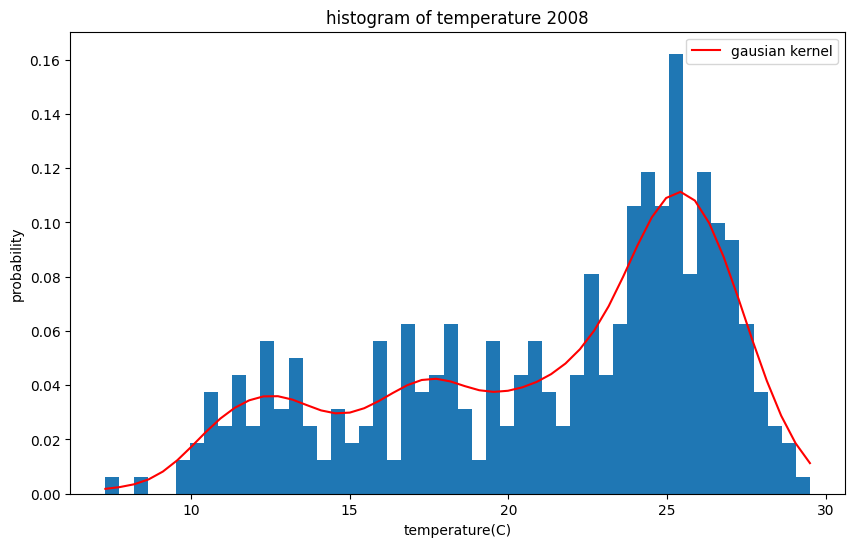

In [35]:
from scipy.stats import gaussian_kde as kd
import matplotlib.pyplot as plt
import numpy as np
x=np.linspace(min(temperature_data),max(temperature_data))
plt.figure(figsize=(10,6))
plt.hist(temperature_data,50,density=True)
plt.ylabel('probability density')
plt.title(r'histogram of dataset')
kde=kd(temperature_data,bw_method=0.2)
plt.plot(x,kde(x),color='red')
plt.xlabel('temperature(C)')
plt.ylabel('probability')
plt.title('histogram of temperature 2008')
plt.legend(['gausian kernel'])
plt.show()



## exercise2

In [38]:
all_day_temperature_box=lines.copy()
all_day_temperature_box = list(map(list,zip(*all_day_temperature_box)))


In [39]:
for i in range(len(all_day_temperature_box)):
    all_day_temperature_box[i]=[x for x in all_day_temperature_box[i] if x != -99]
    

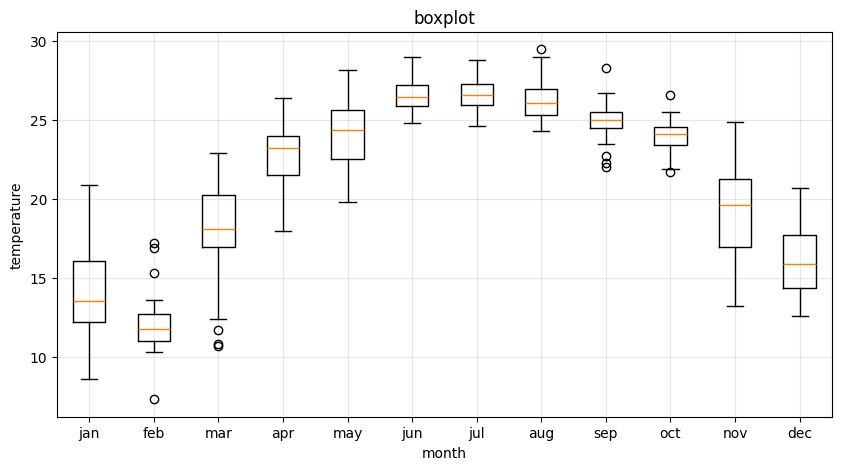

In [46]:
plt.figure(figsize=(10,5))
plt.boxplot(all_day_temperature_box)
plt.grid(True,alpha=0.3)
plt.xlabel('month')
plt.ylabel('temperature')
plt.xticks(np.arange(1,13),('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'))
plt.title('boxplot')
plt.show()

## exercise3

<function matplotlib.pyplot.show(close=None, block=None)>

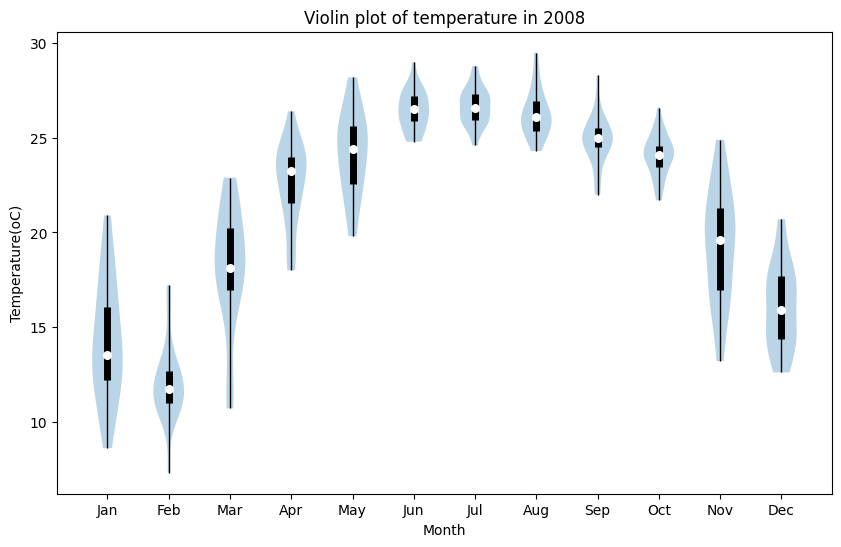

In [52]:
plt.figure(figsize=(10,6))
plt.violinplot(all_day_temperature_box,showmeans=False,showmedians=False,showextrema=False)
for i in range(len(all_day_temperature_box)):
    plt.vlines(i+1, np.percentile(all_day_temperature_box[i], 25), np.percentile(all_day_temperature_box[i], 75), color='k', linewidth=5, linestyle='-')
    plt.vlines(i+1,np.min(all_day_temperature_box[i]),np.max(all_day_temperature_box[i]),color='k',linewidth=1,linestyles='-')
    plt.scatter(i+1,np.percentile(all_day_temperature_box[i],50),marker='o',color='white',s=30,zorder=3)
plt.xlabel('Month')
plt.ylabel('Temperature(oC)')
plt.xticks(np.arange(1, 13), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
plt.title('Violin plot of temperature in 2008')
plt.show          

## exercise4


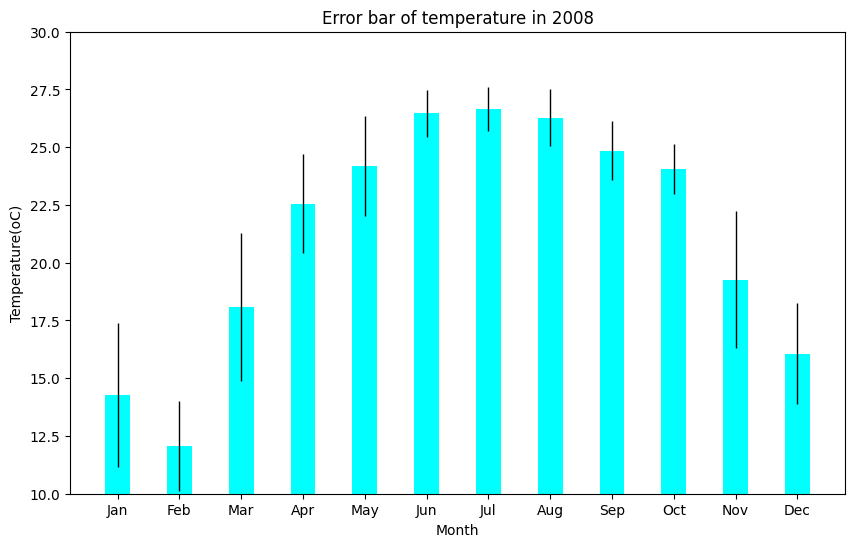

In [53]:
plt.figure(figsize=(10,6))
for i in range(len(all_day_temperature_box)):
    plt.bar(i+1,np.mean(all_day_temperature_box[i]),width=0.4,color='cyan')
    plt.vlines(i+1,np.mean(all_day_temperature_box[i])-np.std(all_day_temperature_box[i]),np.mean(all_day_temperature_box[i])+np.std(all_day_temperature_box[i]),color='black',linestyles='-',lw=1)

plt.ylim(10, 30)
plt.xlabel('Month')
plt.ylabel('Temperature(oC)')
plt.xticks(np.arange(1,13), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
plt.title('Error bar of temperature in 2008')
plt.show()